In [1]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean
import pickle5 as pickle
from tensorflow.keras.optimizers import SGD

In [2]:
train = pd.read_csv('C:/Users/peter/Downloads/Deep Learning/Final/Multi_Label_dataset/train.csv')

In [3]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('./Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7254/7254 [02:12<00:00, 54.56it/s]


In [4]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
print(y.shape)
X.shape 

(7254, 25)


(7254, 400, 400, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [61]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 93, 93, 64)       

In [62]:
es = EarlyStopping(monitor='loss', patience = 3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32,
         callbacks=[es])

Epoch 1/20
204/204 [==============================] - 749s 4s/step - loss: 0.3227 - accuracy: 0.1855 - val_loss: 0.2476 - val_accuracy: 0.1970
Epoch 2/20
204/204 [==============================] - 736s 4s/step - loss: 0.2676 - accuracy: 0.2252 - val_loss: 0.2436 - val_accuracy: 0.1970
Epoch 3/20
204/204 [==============================] - 730s 4s/step - loss: 0.2593 - accuracy: 0.2154 - val_loss: 0.2434 - val_accuracy: 0.1970
Epoch 4/20
204/204 [==============================] - 733s 4s/step - loss: 0.2541 - accuracy: 0.2289 - val_loss: 0.2398 - val_accuracy: 0.1970
Epoch 5/20
204/204 [==============================] - 729s 4s/step - loss: 0.2503 - accuracy: 0.2407 - val_loss: 0.2399 - val_accuracy: 0.2658
Epoch 6/20
204/204 [==============================] - 729s 4s/step - loss: 0.2479 - accuracy: 0.2649 - val_loss: 0.2382 - val_accuracy: 0.2438
Epoch 7/20
204/204 [==============================] - 733s 4s/step - loss: 0.2452 - accuracy: 0.2744 - val_loss: 0.2378 - val_accuracy: 0.3196

In [65]:
#model.save('./Model_Cnn_SECOND')

INFO:tensorflow:Assets written to: ./Model_Cnn_SECOND\assets


In [58]:
model1 = keras.models.load_model('./CNN_Model')

Comedy (0.721)
Drama (0.458)
Romance (0.289)


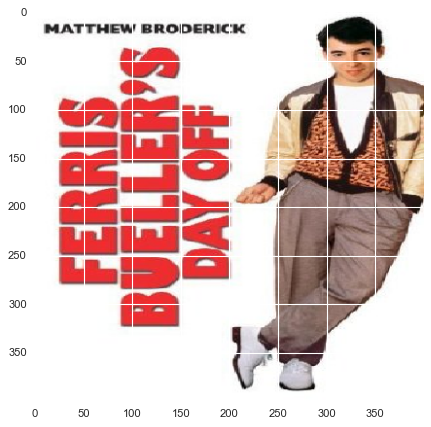

In [471]:

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)
plt.show()

Comedy (0.568)
Drama (0.489)
Romance (0.255)


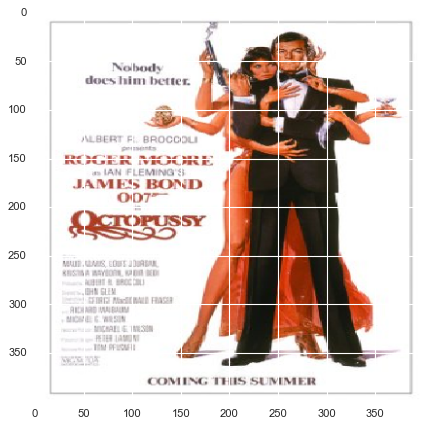

In [475]:

classes = np.array(train.columns[2:])
proba = model.predict(img2.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img2)

Drama (0.545)
Action (0.32)
Thriller (0.284)


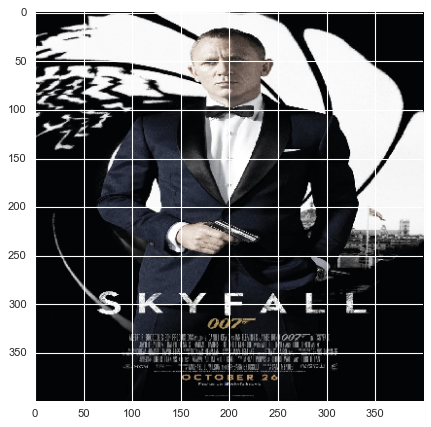

In [478]:

#classes = np.array(train.columns[2:])
proba = model.predict(img3.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img3)

Comedy (0.55)
Drama (0.483)
Romance (0.233)


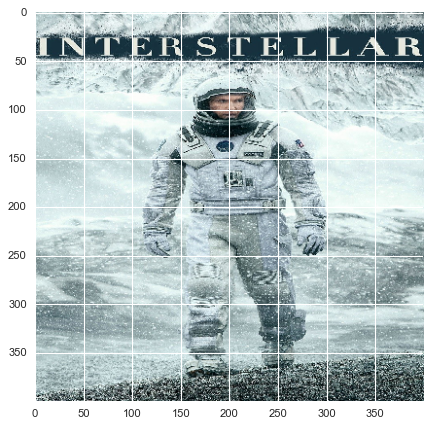

In [479]:

#classes = np.array(train.columns[2:])
proba = model.predict(img4.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img4)

Drama (0.507)
Action (0.25)
Comedy (0.224)


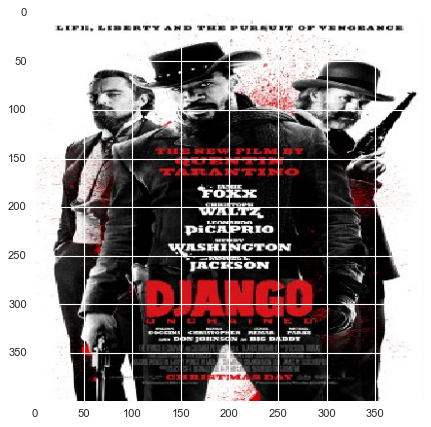

In [484]:

#classes = np.array(train.columns[2:])
proba = model.predict(img5.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img5)

Drama (0.501)
Comedy (0.393)
Romance (0.186)


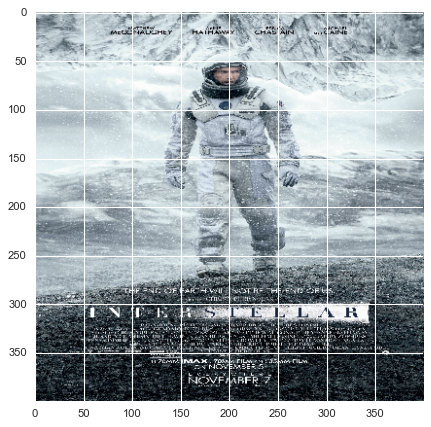

In [522]:
proba = model.predict(img6.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img6)

In [521]:
img6 = image.load_img('./inter.jpg',target_size=(400,400,3))
img6 = image.img_to_array(img6)
img6 = img6/255

In [476]:
img3 = image.load_img('./skyfall.jpg',target_size=(400,400,3))
img3 = image.img_to_array(img3)
img3 = img3/255

img4 = image.load_img('./interStellar.jpg',target_size=(400,400,3))
img4 = image.img_to_array(img4)
img4 = img4/255


In [481]:
train[train['Id']=='tt0816692']

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
6916,tt0816692,"['Adventure', 'Drama', 'Sci-Fi']",0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [482]:
train[train['Id']=='tt1853728']

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
6176,tt1853728,"['Drama', 'Western']",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [524]:
train[train['Id']=='tt0086034']

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [483]:
img5 = image.load_img('./Movie_Poster_Dataset/Movie_Poster_Dataset/2012/tt1853728.jpg',target_size=(400,400,3))
img5 = image.img_to_array(img5)
img5 = img5/255

In [215]:
#pred = model.predict(np.array(X_test))

count = 0
twos = 0
for i in tqdm(range(len(pred))):
    value = 0
    
    first3_index = np.argsort(pred[i])[:-4:-1]
    correct = np.where(y_test[i] == 1)[0]
    placeholder = sum(x == y for x, y in zip(first3_index, correct))
    if (placeholder > 0):
        twos += 1
    for j in first3_index:
        if j in correct:
            value += 1
            
    if (value>0):
        count=count+1
            
print("Images having atleast one genre correctly identified=",count)
print("Images having TWO genres correctly identified=",twos)
print("Total number of images =",len(pred))
print("Accuracy = ", count/len(pred))
print("Accuracy of TWO GENRES = ", twos/len(pred))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 726/726 [00:00<00:00, 27672.60it/s]

Images having atleast one genre correctly identified= 604
Images having TWO genres correctly identified= 293
Total number of images = 726
Accuracy =  0.8319559228650137
Accuracy of TWO GENRES =  0.4035812672176309


In [506]:
#best_guess = model.predict(X_test)
pred = model.predict(np.array(X_test))

In [520]:
#pred = model.predict(np.array(X_test))

count = 0
twos = 0
for i in tqdm(range(len(pred))):
    value = 0
    
    first3_index = np.argsort(pred[i])[:-4:-1]
    correct = np.where(y_test[i] == 1)[0]
    placeholder = sum(x == y for x, y in zip(first3_index, correct))
    if (placeholder > 0 and len(correct) >= 2):
        twos += 1
    for j in first3_index:
        if j in correct:
            value += 1
            
    if (value>0):
        count=count+1
            
print("Images having atleast one genre correctly identified=",count)
print("Images having TWO genres correctly identified=",twos)
print("Total number of images =",len(pred))
print("Accuracy = ", count/len(pred))
print("Accuracy of TWO GENRES = ", twos/len(pred))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 726/726 [00:00<00:00, 14275.77it/s]

Images having atleast one genre correctly identified= 604
Images having TWO genres correctly identified= 228
Total number of images = 726
Accuracy =  0.8319559228650137
Accuracy of TWO GENRES =  0.3140495867768595


In [516]:
len(np.where(y_test[2] == 1)[0])

2

In [331]:
act = X_train[0]
t1 = np.sum(act,axis=-1)
t2 = np.sum(act,axis=1)
t3 = np.sum(act,axis=0)
tsum1 = int(sum(np.cumsum(t1)))
tsum2 = int(sum(np.cumsum(t2)))
tsum3 = int(sum(np.cumsum(t3)))
to = int(np.sqrt(tsum1 - ((tsum2 + tsum3))))
sumers = np.array([tsum1,tsum2,tsum3,to])

In [440]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.ensemble import RakelO

classifier = RakelO(
    base_classifier=GaussianNB(),
    #base_classifier_require_dense=[True, True],
    labelset_size= 25,
    model_count = 50 
)

classifier.fit(mml, y_train)

MajorityVotingClassifier(classifier=LabelPowerset(classifier=GaussianNB(),
                                                  require_dense=[True, True]),
                         clusterer=RandomLabelSpaceClusterer(allow_overlap=True,
                                                             cluster_count=50,
                                                             cluster_size=25),
                         require_dense=[False, False])

In [449]:
from sklearn.naive_bayes import MultinomialNB
classifier1 = RakelO(
    base_classifier=MultinomialNB(),
    #base_classifier_require_dense=[True, True],
    labelset_size= 25,
    model_count = 50 
)

classifier1.fit(mml, y_train)

MajorityVotingClassifier(classifier=LabelPowerset(classifier=MultinomialNB(),
                                                  require_dense=[True, True]),
                         clusterer=RandomLabelSpaceClusterer(allow_overlap=True,
                                                             cluster_count=50,
                                                             cluster_size=25),
                         require_dense=[False, False])

In [450]:
prediction1 = classifier1.predict(mml)
guesses1 = prediction1.A

In [443]:
guesses = prediction.A

In [442]:
prediction = classifier.predict(mml)

In [446]:
counts = 0
for x in range(len(guesses)):
    pred = np.where(guesses[x]==1)[0]
    truth = np.where(y_train[x] ==1)[0]
    for y in pred:
        if y in truth:
            counts +=1
print("Images having atleast One genres correctly identified=",counts)
print("Total number of images =",len(guesses))
print("Accuracy = ", counts/len(guesses))

Images having atleast One genres correctly identified= 3996
Total number of images = 6528
Accuracy =  0.6121323529411765


In [336]:
basic = []
for x in X_train:
    act = x
    t1 = np.sum(act,axis=-1)
    t2 = np.sum(act,axis=1)
    t3 = np.sum(act,axis=0)
    tsum1 = int(sum(np.cumsum(t1)))
    tsum2 = int(sum(np.cumsum(t2)))
    tsum3 = int(sum(np.cumsum(t3)))
    to = int(np.sqrt(tsum1 - ((tsum2 + tsum3))))
    sumers = np.array([tsum1,tsum2,tsum3,to])
    basic.append(sumers)

In [474]:
img2 = image.load_img('./Multi_Label_dataset/Images/tt0086034.jpg',target_size=(400,400,3))
img2 = image.img_to_array(img2)
img2 = img2/255


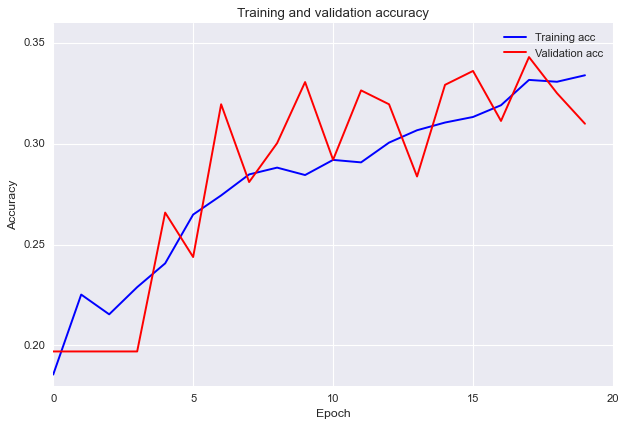

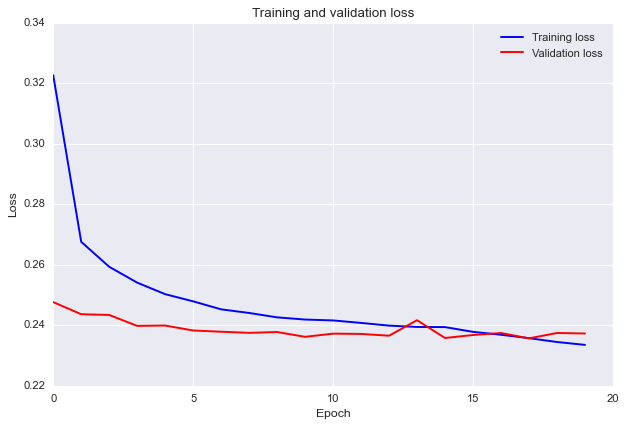

In [523]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
from matplotlib.pyplot import figure
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})
#figure(figsize=(20, 10), dpi=100)

epochs = range(len(acc))
plt.style.use('seaborn')
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()

plt.show()

In [4]:
#df = pickle.load('./Movies_With_Image.pkl')
with open('C:/Users/peter/Downloads/Deep Learning/Final/FINAL_DATA.pkl', "rb") as fh:
      df = pickle.load(fh)

In [6]:
random_seed = 50
train_df = df.sample(frac=0.70, random_state=random_seed) #Taking 70% of the data
tmp_df = df.drop(train_df.index)
test_df = tmp_df.sample(frac=0.1, random_state=random_seed) #Taking 20% of the remaining (after train is taken)
valid_df = tmp_df.drop(test_df.index)

print("Train_df=",len(train_df))
print("Val_df=",len(valid_df))
print("Test_df=",len(test_df))

train_df.to_csv("./Train.csv")
test_df.to_csv("./Test.csv")
valid_df.to_csv("./Valid.csv")

Train_df= 24694
Val_df= 9525
Test_df= 1058


In [2]:
train_df = pd.read_csv("./Train.csv")
test_df = pd.read_csv('./Test.csv')
valid_df = pd.read_csv('./Valid.csv')

In [3]:
def arrange_data(df):
    
    image_data = []
    img_paths = np.asarray(df.iloc[:, -1]) #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
              
        img = image.load_img(img_paths[i],target_size=(200,150,3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    
    X = np.array(image_data)
    Y = np.array(df.iloc[:,7:30])
    
    print("Shape of images:", X.shape)
    print("Shape of labels:", Y.shape)
    
    return X, Y

In [4]:
print("Processing train..")
X_train, Y_train = arrange_data (train_df)
print("Processing valid..")
X_val, Y_val = arrange_data (valid_df)

  0%|                                                                              | 12/24694 [00:00<03:30, 117.00it/s]

Processing train..


  0%|▎                                                                              | 36/9525 [00:00<00:26, 355.26it/s]

Shape of images: (24694, 200, 150, 3)
Shape of labels: (24694, 23)
Processing valid..


100%|█████████████████████████████████████████████████████████████████████████████| 9525/9525 [00:38<00:00, 248.14it/s]


Shape of images: (9525, 200, 150, 3)
Shape of labels: (9525, 23)


In [22]:
np.save('./Y_Train',Y_train)
np.save('./X_val',X_val)
np.save('./Y_val',Y_val)

In [8]:
input_shape=(200,150,3)
num_classes = 23

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (3,3)) )

model.add(Flatten())

#model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 196, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 98, 73, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 94, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 23, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 45632)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 23)                1049559   
Total params: 1,103,255
Trainable params: 1,103,255
Non-trainable params: 0
___________________________________________

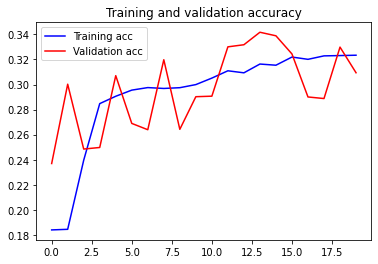

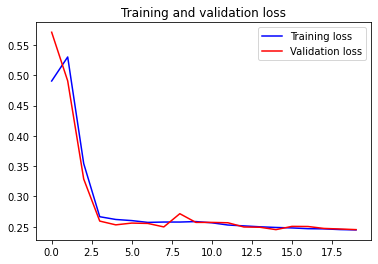

In [247]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()